In [325]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
#Read in data
df = pd.read_csv("forestfires.csv") 

In [324]:
from sklearn import metrics

#Clean data for regression. Log scale area, create dummy variables for months
df['logArea'] = np.log(df.area + 1)
X = df[df.columns[0:12]]
X = pd.get_dummies(X)
X = X._get_numeric_data()
y = df[df.columns[13:14]]

#Create train and test data sets for regression
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 



Text(0.5, 1.0, 'MSE of test data at each depth')

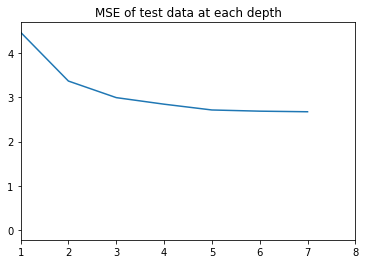

In [326]:
#Now trying k neighbors regression

from sklearn import neighbors

mseList = [0]
for i in range (1,8):
    n_neighbors = i
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_pred = knn.fit(X_train, y_train).predict(X_test)
    mse = metrics.mean_squared_error(y_test, y_pred)
    mseList.append(mse)

plt.plot(mseList)
plt.xlim([1, 8])
plt.title("MSE of test data at each depth")


2.993657256350079
-3.6321975015036285


Text(0.5, 1.0, 'y test (scatter) and knn predictions (line)')

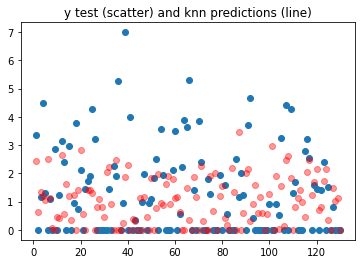

In [316]:
n_neighbors = 3
knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
y_pred = knn.fit(X_train, y_train).predict(X_test)

n_scores = cross_val_score(knn, X, y, scoring='neg_mean_squared_error')
print(np.mean(n_scores))
#Predicts better but cannot get high outliers
x = range(1,len(y_test) + 1)
plt.scatter(x, y_test)
plt.scatter(x, y_pred, color = "red", alpha = 0.4)
plt.title("y test (scatter) and knn predictions (line)")

2.345191827062511


/opt/jupyterhub/pyvenv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/jupyterhub/pyvenv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/jupyterhub/pyvenv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/jupyterhub/pyvenv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConvers

-2.912772881303812


Text(0.5, 1.0, 'y test (scatter) and knn predictions (line)')

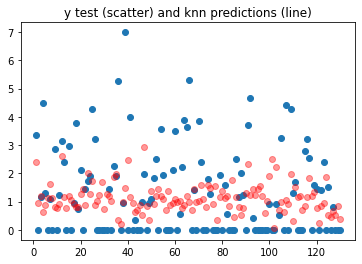

In [323]:
from sklearn import ensemble

#Random forest regression now
forestReg = ensemble.RandomForestRegressor(n_estimators = 100)

forestReg.fit(X_train, y_train.values.ravel())
y_pred = forestReg.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_pred)
print(mse)

n_scores = cross_val_score(forestReg, X, y, scoring='neg_mean_squared_error')
print(np.mean(n_scores))
#Does not predict 0 as well but predicts high values slightly better
x = range(1,len(y_test) + 1)
plt.scatter(x, y_test)
plt.scatter(x, y_pred, color = "red", alpha = 0.4)
plt.title("y test (scatter) and knn predictions (line)")